# Devoir Machine Learning Patient Diabétique ou Non

In [1]:
#import the librairies 
import warnings
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Data preprocessing : exploration et visualisation des datas

In [2]:
df = pd.read_excel("C:\\Users\HP\Downloads\\pima-data.xlsx") # chargement des données

In [3]:
df.sample(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
753,0,181,88,44,510,43.3,0.222,26,1,1.7336,True,True
426,0,94,0,0,0,0.0,0.256,25,0,0.0000,False,False
83,0,101,65,28,0,24.6,0.237,22,0,1.1032,False,False
460,9,120,72,22,56,20.8,0.733,48,0,0.8668,False,False
673,3,123,100,35,240,57.3,0.880,22,0,1.3790,False,False


In [4]:
df.shape, df.columns 

((768, 12),
 Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
        'bmi', 'diab_pred', 'age', 'diabetes_orig', 'skin', 'has_diabetes',
        'diabetes'],
       dtype='object'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_preg       768 non-null    int64  
 1   glucose_conc   768 non-null    int64  
 2   diastolic_bp   768 non-null    int64  
 3   thickness      768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   bmi            768 non-null    float64
 6   diab_pred      768 non-null    float64
 7   age            768 non-null    int64  
 8   diabetes_orig  768 non-null    int64  
 9   skin           768 non-null    float64
 10  has_diabetes   768 non-null    bool   
 11  diabetes       768 non-null    bool   
dtypes: bool(2), float64(3), int64(7)
memory usage: 61.6 KB


Recherche des valeurs Nuls ou manquante

In [107]:
df.isna().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
diabetes        0
dtype: int64

In [7]:
df.isnull().values.any()

False

 Fonction qui permet de vérifier la corrélation entre les features ( jaune = + correlé ; bleu = - correlé)

In [8]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,-0.081672,0.221898,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.057328,0.466581,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.207371,0.065068,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,1.000000,0.074752,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.436783,0.130548,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.392573,0.292695,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.183928,0.173844,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,-0.113970,0.238356,0.238356
diabetes_orig,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.074752,1.000000,1.000000
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,1.000000,0.074752,0.074752


In [9]:
def plot_corr(df, size=11):
    """
    fonction graphique de la matrix de correlation des colonnes.

    Input:
        df: pandas DataFrame
        size: taille vertical et horizontal du plot

    Affiches:
        matrix de correlation entre colonnes.  Blue-cyan-jaune-rouge-noir => du moins au plus correlé
                                                0 ------------------>  1
    """

    corr = df.corr()    # fonction de correlation
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # code couleur des rectangles par valeur de correlation
    plt.xticks(range(len(corr.columns)), corr.columns)  # dessin x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

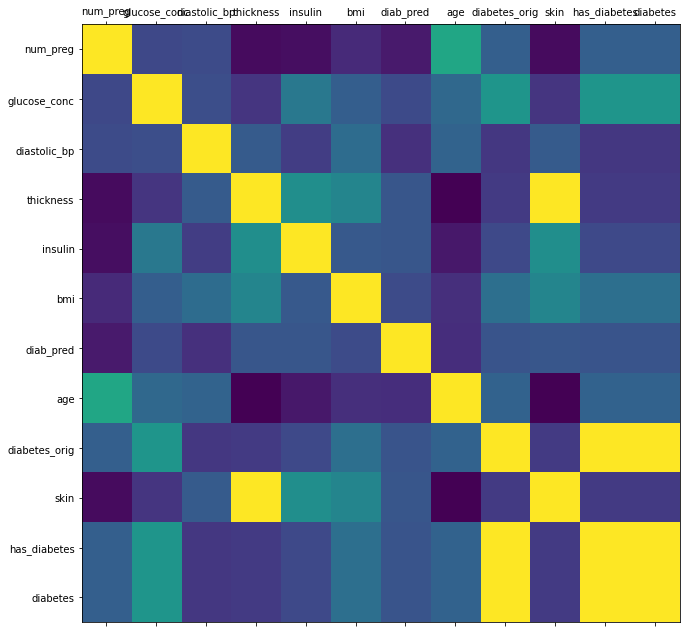

In [10]:
plot_corr(df)

#Suppression des colonnes qui ont une très forte corrélation car elle ne nous apporte pas grand information

In [11]:
col_del = ["has_diabetes","skin", "diabetes_orig"]
df1 = df.drop(col_del, axis=1, inplace=True)

In [12]:
df.sample(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
417,4,144,82,32,0,38.5,0.554,37,True
74,1,79,75,30,0,32.0,0.396,22,False
499,6,154,74,32,193,29.3,0.839,39,False


In [13]:
col_diabete = {True : 1, False : 0}
df["diabetes"] = df["diabetes"].map(col_diabete)

In [14]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
population =len(df)
pop_malade = len(df[df["diabetes"]==1])
pop_sain = len(df[df["diabetes"]==0])

print(f"Nous avons une population de: {population}")
print(f"avec {pop_malade} diabétique soit un ration de {(pop_malade/population)*100}% ")
print(f"et {100 -(pop_malade/population)*100 }% de non malade")

Nous avons une population de: 768
avec 268 diabétique soit un ration de 34.89583333333333% 
et 65.10416666666667% de non malade


In [54]:
from sklearn.model_selection import train_test_split
feature_col_name = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age']
predict_col_name = ['diabetes']
X = df[feature_col_name].values
y = df[predict_col_name].values
split_test_size = 0.30
X_train,  X_test, y_train, y_test=train_test_split(X,y,test_size=split_test_size, random_state=42)

In [59]:
print("le dataset de train est {0:0.2f}%".format(len(X_train)/len(df.index)))
print("le dataset de test est {0:0.2f}%".format(len(X_test)/len(df.index)))

le dataset de train est 0.70%
le dataset de test est 0.30%


In [92]:
a = len(y_train) + len(y_test)
trainy_1 = y_train[y_train[:]==1]
trainy_0 = y_train[y_train[:]==0]
testy_1 = y_test[y_test[:]==1]
testy_0 = y_test[y_test[:]==0]
print("Nous avons un total de {0} de valeur à prédire".format(len(y_train) + len(y_test)))
#print("Nous avons {0}% de valeur à prédire à 1 de test".format())
print(f"dans {len(y_train)} d'observation de train à prédire, nous avons :{len(trainy_1)/len(y_train)}% de valeur à 1 et {len(trainy_0)/len(y_train) }%  de valeur à 0 ")
print(f"dans {len(y_test)} d'observation de test à prédire, nous avons :{len(testy_1)/len(y_test)}% de valeur à 1 et {len(testy_0)/len(y_test) }%  de valeur à 0 ")
#print("dans {0} d'observation de test à prédire, nous avons : {1:0.2f}% de valeur à 1 et {2:0.2f}%  de valeur à 0").format(len(y_test), len(testy_1)/a, len(testy_0)/a )

Nous avons un total de 768 de valeur à prédire
dans 537 d'observation de train à prédire, nous avons :0.3500931098696462% de valeur à 1 et 0.6499068901303539%  de valeur à 0 
dans 231 d'observation de test à prédire, nous avons :0.3463203463203463% de valeur à 1 et 0.6536796536796536%  de valeur à 0 


In [108]:
for i in feature_col_name:
    lon_nul = len(df[df[i]==0])
    a = lon_nul/len(df.values)
    print(f"la colonne {i} à {lon_nul} valeurs nulles, soit {a}% de valeur nulles ")

la colonne num_preg à 111 valeurs nulles, soit 0.14453125% de valeur nulles 
la colonne glucose_conc à 5 valeurs nulles, soit 0.006510416666666667% de valeur nulles 
la colonne diastolic_bp à 35 valeurs nulles, soit 0.045572916666666664% de valeur nulles 
la colonne thickness à 227 valeurs nulles, soit 0.2955729166666667% de valeur nulles 
la colonne insulin à 374 valeurs nulles, soit 0.4869791666666667% de valeur nulles 
la colonne bmi à 11 valeurs nulles, soit 0.014322916666666666% de valeur nulles 
la colonne diab_pred à 0 valeurs nulles, soit 0.0% de valeur nulles 
la colonne age à 0 valeurs nulles, soit 0.0% de valeur nulles 


Nous decidons de remplacer les valeurs manquantes par la moyenne ( imputation)

In [115]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

Algo de training - Naives Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

Performence sur les données d'entrainement

In [122]:
# valeur prédict en utilisant les données de train
nb_predict_train = nb_model.predict(X_train)
from sklearn import metrics
print("l'accuracy est de {0:0.2f}".format(metrics.accuracy_score(y_train, nb_model.predict(X_train))))

l'accuracy est de 0.75


In [123]:
# donnée de train 
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



performance sur les données de test

In [124]:
#prediction des valeur , utilisation des données de test
nb_predict_test = nb_model.predict(X_test)
# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Acurrancy: {0:0.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Acurrancy: 0.7359


Random forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

prediction donnée de training

In [126]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 1.0000


prediction données de tests

In [127]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7403


In [128]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Regression logistique

In [129]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7489
[[125  26]
 [ 32  48]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV


In [130]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False)

Prediction sur les données de Test

In [131]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7056
[[109  42]
 [ 26  54]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231

